**Problem Statement -**
The objective of this project is to build and compare multiple machine learning algorithms
for the classification of round winners in the game CS:GO.

**Key Features of CS:GO**:
**Game Modes**:

**Competitive**: Standard 5v5 matches with two teams competing in 30 rounds, with the first team to win 16 rounds winning the match.

**Casual**: Less intense than Competitive, allowing players to enjoy the game without the pressure of ranked play.

**Deathmatch**: Players respawn instantly after death, aiming to get as many kills as possible within a set time limit.

**Arms Race**: Players advance through a series of weapons by getting kills, starting from weaker guns and progressing to stronger ones.

**Demolition**: A combination of bomb defusal and arms race modes, where players earn new weapons by getting kills and attempt to plant or defuse a bomb.

**Maps**: A variety of maps, each with its unique layout and strategic points. Popular maps include Dust II, Mirage, Inferno, and Nuke.

**Weapons and Equipment**: A wide range of firearms, grenades, and other equipment that players can buy at the start of each round using in-game currency earned from previous rounds.

**Skill Groups**: A ranking system that places players in different skill groups based on their performance in competitive matches.

**Esports: CS**
is a major title in the esports scene, with professional teams competing in tournaments worldwide for significant prize money.

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the neccessary libraries

In [90]:
import numpy as np # Numerical python
import pandas as pd #Data Manipulation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

In [91]:
# Load the data

df = pd.read_csv(r'/content/drive/MyDrive/csgo_round_snapshots.csv')

**About this file**

The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.

In [92]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [93]:
# checking balaced datset

df['round_winner'].value_counts()

,count
round_winner,
T,62406
CT,60004


In [94]:
df.shape

(122410, 97)

In [95]:
# total columns
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [96]:
df.describe().round(2)

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,...,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00,122410.00
mean,97.89,6.71,6.78,412.11,402.71,314.14,298.44,9789.02,11241.04,2.05,...,1.85,1.86,1.54,1.63,1.00,0.02,0.05,1.35,0.03,0.03
std,54.47,4.79,4.82,132.29,139.92,171.03,174.58,11215.04,12162.81,1.84,...,1.77,1.79,1.74,1.83,1.46,0.14,0.23,1.66,0.17,0.16
min,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,54.92,3.00,3.00,350.00,322.00,194.00,174.00,1300.00,1550.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,94.91,6.00,6.00,500.00,500.00,377.00,334.00,5500.00,7150.00,2.00,...,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,166.92,10.00,10.00,500.00,500.00,486.00,468.00,14600.00,18000.00,4.00,...,3.00,3.00,3.00,3.00,2.00,0.00,0.00,2.00,0.00,0.00
max,175.00,32.00,33.00,500.00,600.00,500.00,500.00,80000.00,80000.00,5.00,...,7.00,7.00,6.00,9.00,5.00,3.00,3.00,5.00,3.00,2.00


In [97]:
# checking null values in the dataset

df.isnull().sum().sum()

np.int64(0)

In [98]:
df['map'].value_counts()

,count
map,
de_inferno,23811
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11137
de_cache,145


In [99]:
counts = df['map'].value_counts()
total = counts.sum()
percentage = counts/total * 100
print(percentage)

for map_name, count, percent in zip(counts.index, counts.values, percentage.values):
  print(f'{map_name}: {percent:.2f}%: ','' '//', count)

map
de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: count, dtype: float64
de_inferno: 19.45%:  // 23811
de_dust2: 18.09%:  // 22144
de_nuke: 15.54%:  // 19025
de_mirage: 15.18%:  // 18576
de_overpass: 11.50%:  // 14081
de_train: 11.02%:  // 13491
de_vertigo: 9.10%:  // 11137
de_cache: 0.12%:  // 145


In [100]:
counts.index

Index(['de_inferno', 'de_dust2', 'de_nuke', 'de_mirage', 'de_overpass',
       'de_train', 'de_vertigo', 'de_cache'],
      dtype='object', name='map')

In [101]:
counts.values

array([23811, 22144, 19025, 18576, 14081, 13491, 11137,   145])

In [102]:
percentage.values

array([19.45184217, 18.09002532, 15.54203088, 15.17523078, 11.50314517,
       11.0211584 ,  9.0981129 ,  0.11845437])

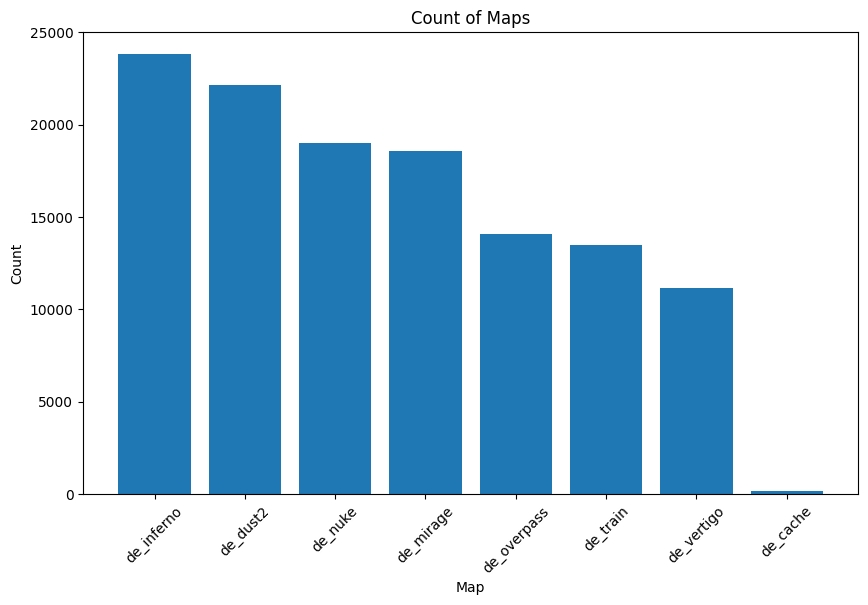

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45)
plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Count of Maps')
plt.show()

In [104]:
# Same above graph using plotly

from matplotlib.axis import XAxis
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = counts.index, y=counts.values))
fig.update_layout(xaxis_title='Map', yaxis_title = 'Count')
fig.show()

In [105]:
col = df.columns

In [106]:
# checking columns dtypes of either object or bool

for i in col:
  if (df[i].dtypes == 'object') | (df[i].dtypes == 'bool'):
    print("The categorical columns are:", i)

The categorical columns are: map
The categorical columns are: bomb_planted
The categorical columns are: round_winner


In [107]:
df['bomb_planted'].value_counts()

,count
bomb_planted,
False,108726
True,13684


In [108]:
df['map'].value_counts()

,count
map,
de_inferno,23811
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11137
de_cache,145


In [109]:
df['round_winner'].value_counts()

,count
round_winner,
T,62406
CT,60004


In [110]:
# !pip install ydata-profiling

In [111]:
# from ydata_profiling import ProfileReport

In [112]:
# profile = ProfileReport(df, title = 'Profiling Report')
# profile

In [113]:
# profile.to_file("vishal_profiing_report.html")

In [114]:
# Lable Encoding

# Converts categorical features into integer columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['map'] = le.fit_transform(df['map'])
df['round_winner'] = le.fit_transform(df['round_winner'])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])


In [115]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [116]:
X = df.drop(columns = ['round_winner'])
y = df['round_winner']

In [117]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
y.head()

,round_winner
0,0
1,0
2,0
3,0
4,0


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [120]:
X_train.shape

(97928, 96)

In [121]:
X_test.shape

(24482, 96)

In [122]:
y_train.shape

(97928,)

In [123]:
y_test.shape

(24482,)

In [124]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [125]:
x_train

array([[-1.18271918,  1.31487825,  1.70421317, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.851754  ,  1.7326225 ,  0.04557825, ..., -0.21118431,
        -0.16466055, -0.15653985],
       [-0.05427852,  2.15036674,  1.70421317, ...,  0.99192555,
        -0.16466055, -0.15653985],
       ...,
       [-0.42069114, -0.56497085, -0.78373921, ...,  1.59348047,
         5.69041524, -0.15653985],
       [ 0.31323609, -1.40045934, -1.40572731, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.78820574, -0.56497085,  1.08222507, ..., -0.21118431,
        -0.16466055,  5.9630747 ]])

In [126]:
x_test

array([[ 1.4168819 ,  0.89713401, -0.57640985, ..., -0.81273923,
        -0.16466055,  5.9630747 ],
       [-0.05336019,  0.27051764, -0.57640985, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-1.52305129,  1.52375037,  0.66756634, ..., -0.21118431,
        -0.16466055, -0.15653985],
       ...,
       [-1.52286763, -1.40045934, -1.19839794, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.05336019, -1.19158722, -1.40572731, ..., -0.81273923,
         5.69041524, -0.15653985],
       [ 1.41559624,  0.06164552,  1.28955444, ..., -0.81273923,
        -0.16466055, -0.15653985]])

In [127]:
x_train

array([[-1.18271918,  1.31487825,  1.70421317, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.851754  ,  1.7326225 ,  0.04557825, ..., -0.21118431,
        -0.16466055, -0.15653985],
       [-0.05427852,  2.15036674,  1.70421317, ...,  0.99192555,
        -0.16466055, -0.15653985],
       ...,
       [-0.42069114, -0.56497085, -0.78373921, ...,  1.59348047,
         5.69041524, -0.15653985],
       [ 0.31323609, -1.40045934, -1.40572731, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.78820574, -0.56497085,  1.08222507, ..., -0.21118431,
        -0.16466055,  5.9630747 ]])

In [128]:
# Applying the LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [129]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [130]:
lda.transform(x_test)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

In [131]:
# This is only for ref
# The value of expontial (e) = 2.718

import numpy as np
x=np.array([1,2,3])
exp_values=np.exp(x)  #2.71
print(exp_values)

[ 2.71828183  7.3890561  20.08553692]


In [132]:
#this is only for refrence

x=np.array([-1,-2,-3,-4])
abs_val=np.abs(x)
print(abs_val)

[1 2 3 4]


In [133]:
lda_coef = np.exp(np.abs(lda.coef_)) # lda.coef is built in function

In [134]:
lda_coef

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
        1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
        1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
        1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
        1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
        1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
        1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
        1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
        1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
        1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
        1.0223457 , 1.00392739, 1.00787732, 1.06

In [135]:
lda_coef = lda_coef.flatten()

In [136]:
lda_coef

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

In [137]:
X.shape

(122410, 96)

In [138]:
num_feature = X.shape[1]
num_feature

96

In [139]:
feature_indices = np.arange(num_feature)
feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [140]:
X.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [141]:
feature_name = list(X.columns)
feature_name

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

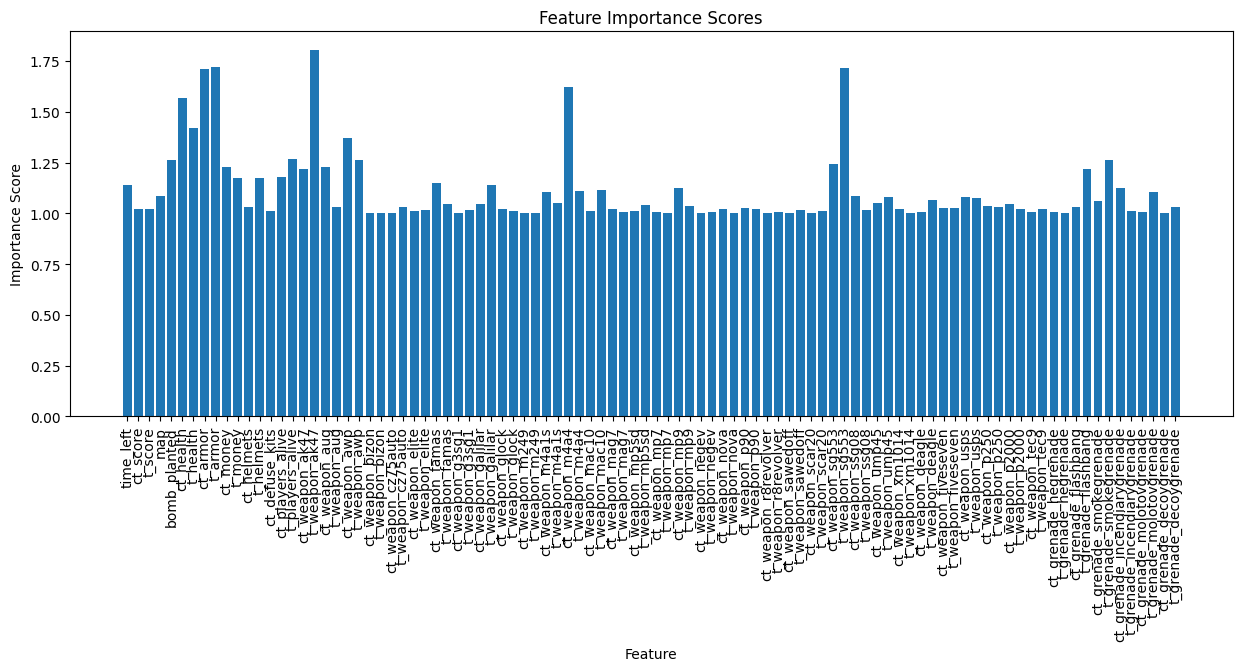

In [142]:
plt.figure(figsize=(15,5))
plt.bar(feature_indices,lda_coef)
plt.xticks(feature_indices,feature_name,rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

In [143]:
# Performing feature selection using LDA by using the absolute values of the
# LDA coefficients as a measure of feature importance.

In [144]:
df_feature_score=pd.DataFrame({"Feature_names":feature_name,"feature_scores":lda_coef})
df_feature_score

,Feature_names,feature_scores
0,time_left,1.140514
1,ct_score,1.023482
2,t_score,1.023610
3,map,1.087112
4,bomb_planted,1.264437
...,...,...
91,t_grenade_incendiarygrenade,1.010063
92,ct_grenade_molotovgrenade,1.008522
93,t_grenade_molotovgrenade,1.104241
94,ct_grenade_decoygrenade,1.002317


In [145]:
top_20_values=df_feature_score.nlargest(20,'feature_scores')

In [146]:
# Selecting the top 20 features based on the feature importance

In [147]:
top_20_values.head(20)

,Feature_names,feature_scores
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
65,t_weapon_sg553,1.716493
7,ct_armor,1.711748
40,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [148]:
top_20_values.index

Index([17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,
       12],
      dtype='int64')

In [149]:
x_train=x_train[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14,
            10, 12]]

In [150]:
x_test=x_test[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14,
            10, 12]]

In [151]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [153]:
accuracy_score(y_test,y_pred)

0.7517359692835552

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [155]:
y_test.value_counts()

,count
round_winner,
1,12478
0,12004


In [156]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [157]:
accuracy_score(y_test, y_pred)

0.8158647169348909

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [159]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()
rft.fit(x_train, y_train)

RandomForestClassifier()

In [160]:
y_pred = rft.predict(x_test)

In [161]:
accuracy_score(y_test, y_pred)

0.8572012090515481

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12004
           1       0.86      0.86      0.86     12478

    accuracy                           0.86     24482
   macro avg       0.86      0.86      0.86     24482
weighted avg       0.86      0.86      0.86     24482



In [163]:
# Clearly we can see that random forest is the best model for this dataset.
# It has the highest accuracy and f1-score